# UAS
Muhammad Satriya Pratama M.K.
(A11.2022.14225)

# Persiapan

In [1]:
# Mount Google Drive
# Langkah ini bertujuan untuk menghubungkan Google Colab dengan Google Drive
# sehingga kita bisa membaca file yang ada di Drive (misalnya, "adult.csv").
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis (EDA)

In [14]:
#Load Dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/BengKod/ObesityDataSet.csv'

df = pd.read_csv(file_path)

# Tampilkan beberapa baris dataset
print("=== 5 Baris Pertama Dataset ===")
df.head(5)

=== 5 Baris Pertama Dataset ===


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [23]:
#Informasi umum dataset
print("\n=== Informasi Dataset ===")
df.info()


=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2102 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2106 non-null   object 
 5   FAVC                            2100 non-null   object 
 6   FCVC                            2103 non-null   object 
 7   NCP                             2089 non-null   float64
 8   SCC                             2101 non-null   object 
 9   SMOKE                           2106 non-null   object 
 10  CH2O                            2096 non-null   float64
 11  family_history_with_overweight  2098 non-null   object 
 12  FAF    

In [24]:
# Deskripsi statistik untuk fitur numerik
print("\n=== Descriptive Statistics (Numerik) ===")
df.describe()


=== Descriptive Statistics (Numerik) ===


,Age,Height,Weight,NCP,CH2O,FAF,TUE
count,2089.000000,2089.000000,2092.000000,2089.000000,2096.000000,2092.000000,2096.000000
mean,24.717928,1.706623,88.608184,2.729418,2.030560,1.073435,0.680138
std,8.391323,0.117700,36.154617,0.981124,0.737945,1.149364,0.717160
min,14.000000,1.450000,39.000000,1.000000,1.000000,0.000000,0.000000
25%,19.955257,1.630000,66.000000,2.675411,1.569911,0.129009,0.000000
50%,22.814657,1.701284,83.000000,3.000000,2.000000,1.000000,0.625360
75%,26.000000,1.770000,108.055736,3.000000,2.482454,1.683612,1.000000
max,106.441252,2.853986,441.131078,12.299828,9.233294,12.270275,7.669504


In [25]:
# Descriptive statistics untuk fitur kategorikal
print("\n=== Descriptive Statistics (Kategorikal) ===")
df.describe(include=['object', 'category'])


=== Descriptive Statistics (Kategorikal) ===


,Gender,CALC,FAVC,FCVC,SCC,SMOKE,family_history_with_overweight,CAEC,MTRANS,NObeyesdad
count,2102,2106,2100,2103,2101,2106,2098,2100,2105,2111
unique,3,5,3,808,3,3,3,5,6,7
top,Male,Sometimes,yes,3,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_I
freq,1056,1386,1844,647,1997,2054,1705,1747,1572,351


In [27]:
# Cek missing values per kolom
print("\n=== Missing Values per Kolom ===")
print(df.isnull().sum())


=== Missing Values per Kolom ===
Age                               22
Gender                             9
Height                            22
Weight                            19
CALC                               5
FAVC                              11
FCVC                               8
NCP                               22
SCC                               10
SMOKE                              5
CH2O                              15
family_history_with_overweight    13
FAF                               19
TUE                               15
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [9]:
# Cek jumlah nilai unik per kolom
print("\n=== Jumlah Nilai Unik per Kolom ===")
print(df.nunique())



=== Jumlah Nilai Unik per Kolom ===
Age                               1394
Gender                               3
Height                            1562
Weight                            1518
CALC                                 5
FAVC                                 3
FCVC                               808
NCP                                637
SCC                                  3
SMOKE                                3
CH2O                              1263
family_history_with_overweight       3
FAF                               1186
TUE                               1130
CAEC                                 5
MTRANS                               6
NObeyesdad                           7
dtype: int64


In [10]:
# Cek data duplikat
num_duplicates = df.duplicated().sum()
print(f"\nJumlah Baris Duplikat: {num_duplicates}")



Jumlah Baris Duplikat: 18


In [11]:
# Cek keseimbangan target
print("\n=== Distribusi Kelas Target (NObeyesdad) ===")
print(df['NObeyesdad'].value_counts())


=== Distribusi Kelas Target (NObeyesdad) ===
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


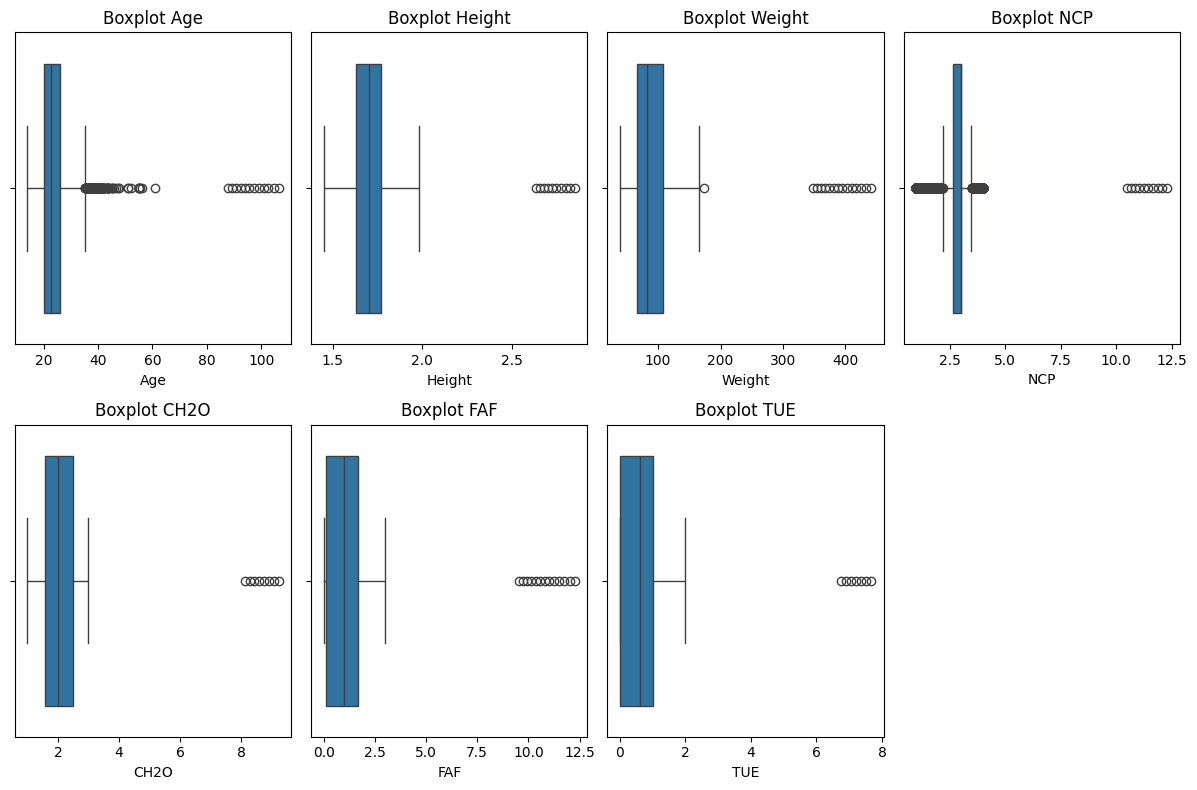

In [30]:
# Boxplot untuk variabel kontinu
kontinu_cols = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF', 'TUE']
valid_continuous = [col for col in kontinu_cols if col in df.columns]
plt.figure(figsize=(12, 8))
for i, col in enumerate(valid_continuous, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=df, x=col, orient='h')
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

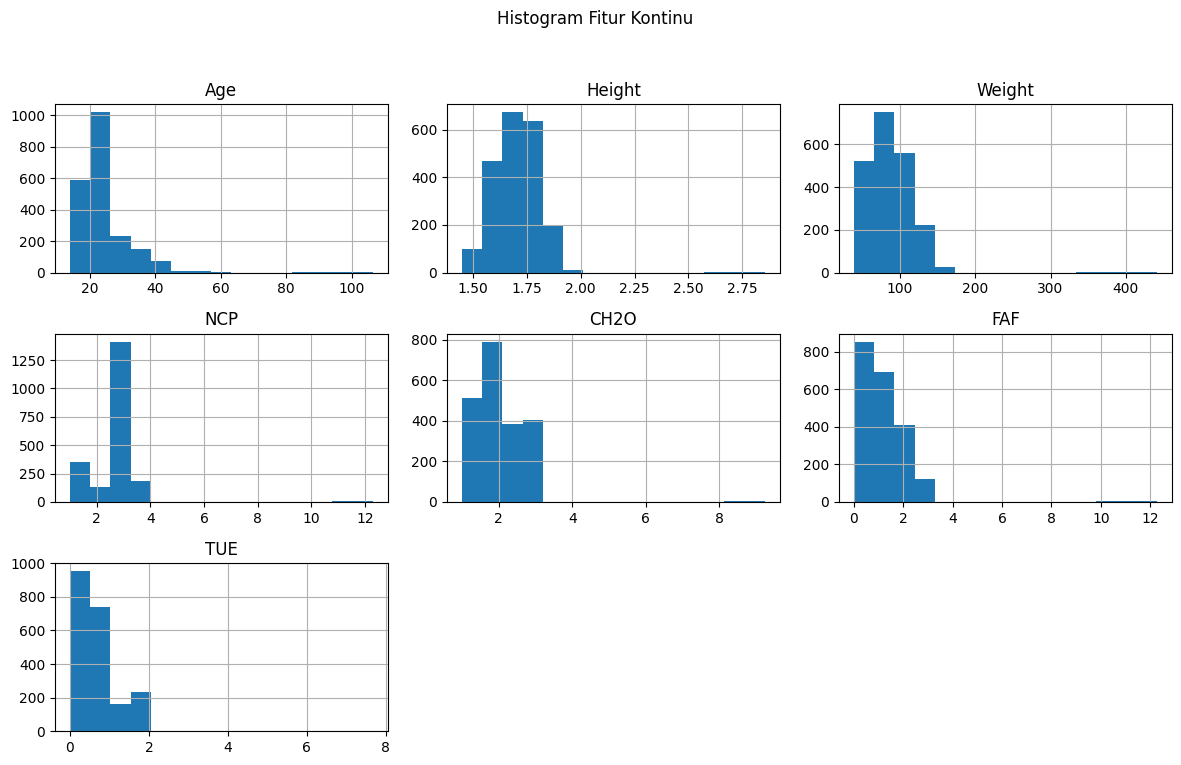

In [21]:
valid_cols = [col for col in kontinu_cols if col in df.columns]
for col in valid_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

plt.figure(figsize=(12, 8))
if valid_cols:
    df[valid_cols].hist(bins=15, figsize=(12, 8))
    plt.suptitle('Histogram Fitur Kontinu')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


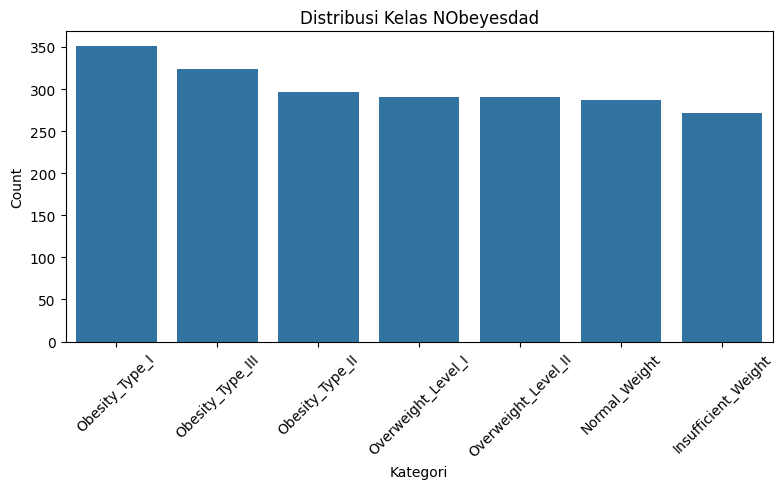

In [16]:
# Countplot untuk target
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribusi Kelas NObeyesdad')
plt.ylabel('Count')
plt.xlabel('Kategori')
plt.tight_layout()
plt.show()

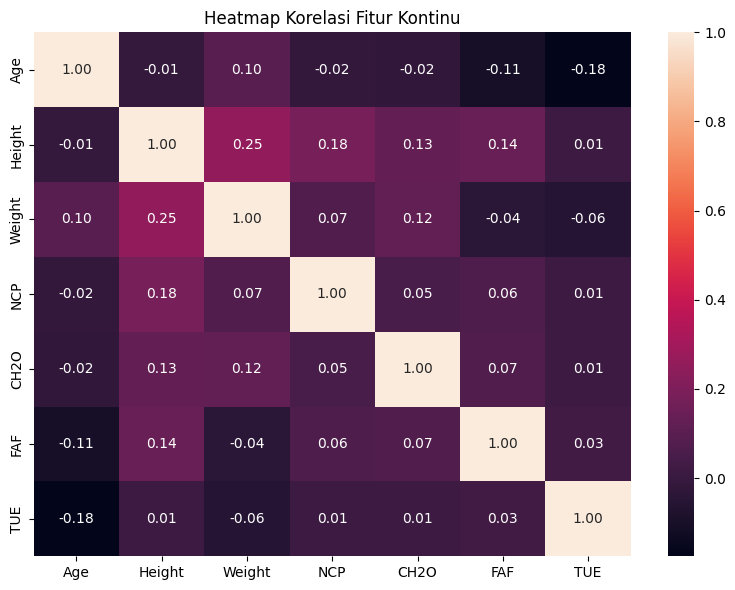

In [22]:
# Heatmap korelasi fitur kontinu
plt.figure(figsize=(8, 6))
if valid_cols:
    corr_matrix = df[valid_cols].corr()
    sns.heatmap(corr_matrix, annot=True, fmt=".2f")
    plt.title('Heatmap Korelasi Fitur Kontinu')
    plt.tight_layout()
    plt.show()
